# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!

## 7. Exercise: Final Project
- trend: .lineplot()
- Relationship: . barplot(), .heatmap(), .scatterplot(), regplot(), .lmplot(), .swarmplot()
- Distribution: .histoplot(), .kdeplot(), jointplot()

### 0.- Content
1.0.- Import libraries and read zipfile & dataset content
1.1.- Read data. Take first look
1.2.- Exploring the data
2.0.- Direct Graphs
2.1.- .lineplot()


### 1.0.- Import libraries and read zipfile & dataset content

In [1]:
import zipfile as zfm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zipfile = 'BankCustChurn.zip'
dataset = 'Bank Customer Churn Prediction.csv'

# dir(zfm.ZipFile)
with zfm.ZipFile(zipfile) as zf:
    # datasets = zf.infolist()
    datasets = zf.namelist()
    # datasets = zf.getinfo(name='fifa.csv')
    if dataset in zf.namelist():
        print(f'Dataset "{dataset}" founded in "{zipfile}"')
        # to see first dataset lines (first lines -cols- to found possible index)
        numln = 1
        for ln in zf.open(dataset):
            print(ln)
            if numln == 4: break
            numln += 1

Dataset "Bank Customer Churn Prediction.csv" founded in "BankCustChurn.zip"
b'customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn\r\n'
b'15634602,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n'
b'15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n'
b'15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n'


##### Each customer has the following attriutes:
1. Customer ID - The Unique ID of each individual customer
2. Credit Score - A number depicting the customer’s credithworthiness
3. Country - The country the customer banks from
4. Gender - The gender the customer identifies with
5. Age - Depicts the customers age
6. Tenure - Indicates how length in years the customer has been with the bank
7. Balance - The amount currently available in the customer’s account
8. Products Number - The number of products purchased by the customer through the bank
9. Credit Card - Indicates the customer has a credit card
10. Active Member - Indicates if the customer is an active or inactive
11. Estimated Salary - Bank Estimation of the income of the customer
12. Churn - Indicator of if the customer has left the bank or not

### 1.1.- Read data. Take first look

In [2]:
with zfm.ZipFile(zipfile) as zf:
    df = pd.read_csv(zf.open(dataset))
print(df.shape)
df.iloc[[0, 5, 9, -9, -5, -1]]

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 1.2.- Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 2.0.- Direct Charts
- Graphics derived directly from the data format.
- The df is a long-form dataset, each row is an observation and each col is a variable (12 variables).
- Direct Charts for long-format: .relplot(), .lineplot(), 
- 2.1. Line Charts, .lineplot(): no very clear mk one.
- Heatmap, .heatplot(): no direct for long-format ...later
- 2.2. Scatter, .scatterplot(): relation between vars -- very intersting.
- 2.3. Distribution charts, histograms, KDE..

#### 2.1.- Line Charts
- .lineplot(): visualize trend (usually over time).
- Some trends over customers_id

Text(0.5, 0, '')

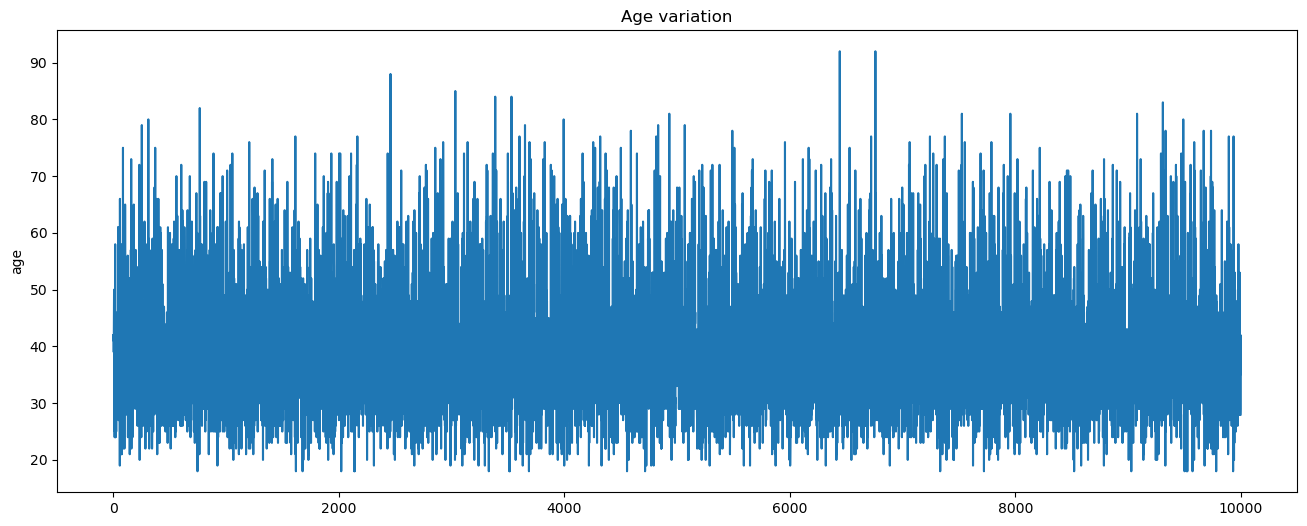

In [5]:
# age trend - index x_axis
fig, axl1 = plt.subplots(figsize=(16,6))
sns.lineplot(data=df['age'], ax=axl1)
axl1.set_title("Age variation")
axl1.set_xlabel(df.index.name)

Text(0.5, 0, 'customer_id')

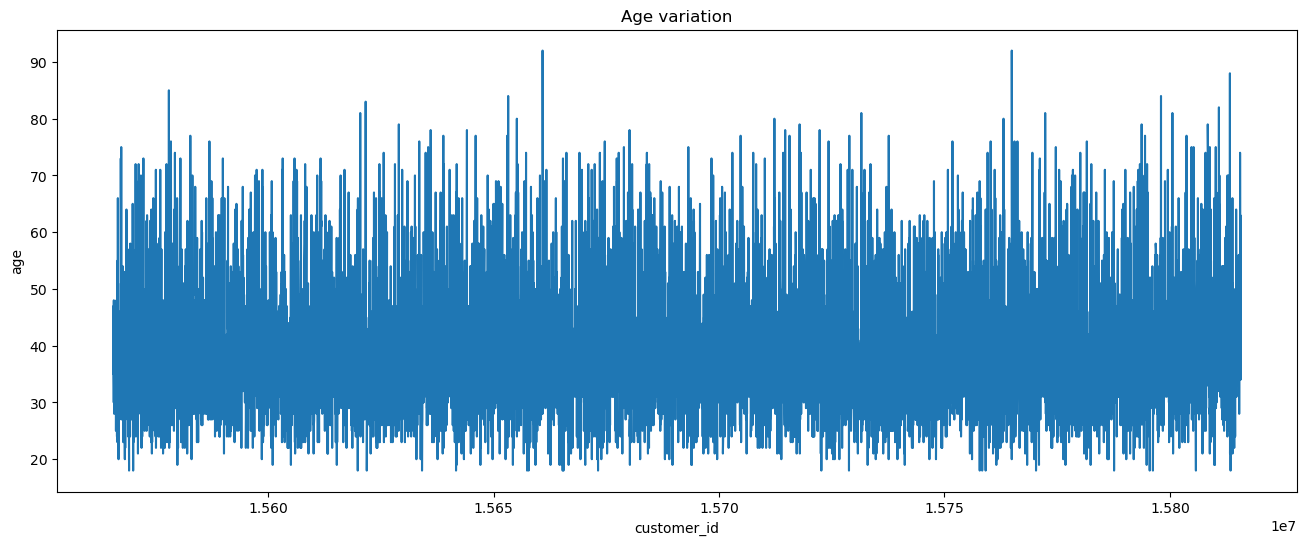

In [6]:
# age trend - custormer_id x_axis
fig, axl1 = plt.subplots(figsize=(16,6))
sns.lineplot(data=df, x='customer_id', y='age', ax=axl1)
axl1.set_title("Age variation")
axl1.set_xlabel(df.customer_id.name)

#### 2.2.- Scatter Charts: relation between variables - .scatterplot()
- One important target (var to predict) is churn (cause want to known possible lost of clients).
- .scatterplot() is usually use to highlight the relationship between two continuous variables (like "age" and "credit_score")
- And could hue particulary with churn.

Isn't too much what i can conclude. Maybe try anothers vars w/churn
> Will try other var relations and use churn as hue...

Text(0.5, 1.0, 'Age vs Credit Score')

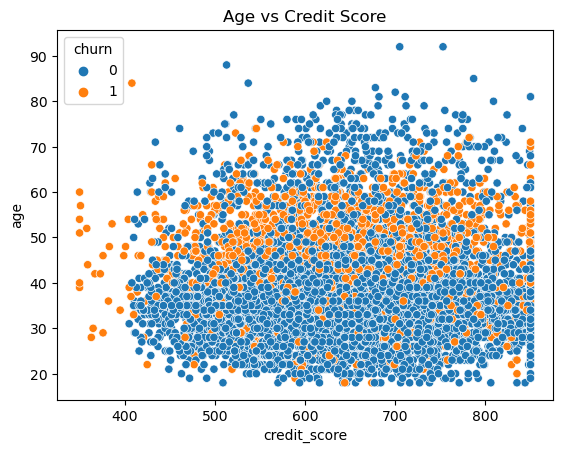

In [7]:
# age and credit_score colored by churn... 
fig, axscat2 = plt.subplots()
sns.scatterplot(x=df.credit_score, y=df.age, hue=df.churn, ax=axscat2)
axscat2.set_title('Age vs Credit Score')

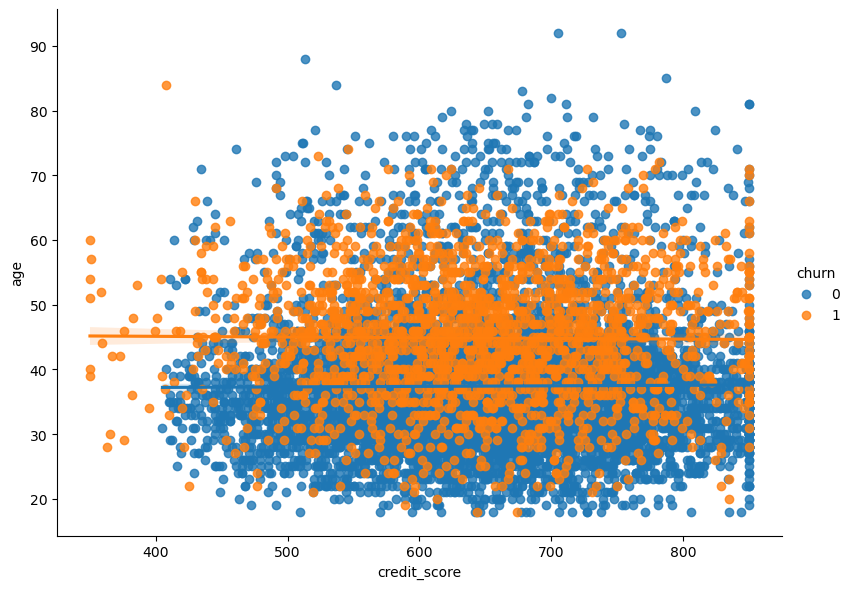

In [8]:
# ading regression lines - .lmplot(): figure-leve chart
sns.lmplot(data=df, x='credit_score', y='age', hue='churn',
          height=6, aspect=4/3)

> Can conclude that churn do not vary with credit score. Also that average of churn is higher than average of no-churn.
- Let's verify this with calcs.

In [9]:
for ch in [0, 1]:
    print(f"churn = {ch} -> Average age = {df[df.churn == ch]['age'].mean():>6.1f}")

churn = 0 -> Average age =   37.4
churn = 1 -> Average age =   44.8


However, we can adapt the design of the scatter plot to feature a categorical variable (like "churn") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

<Axes: xlabel='churn', ylabel='balance'>

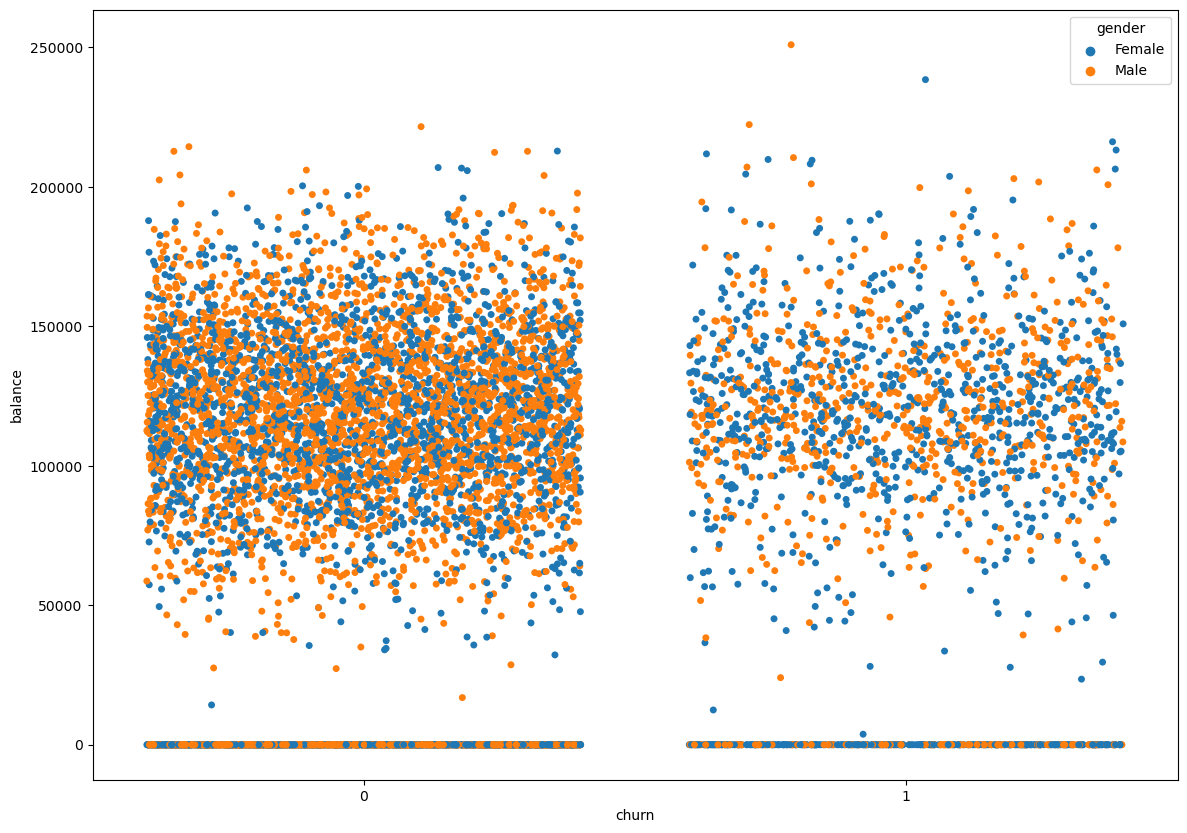

In [122]:
fig, axstrip1 = plt.subplots(figsize=(14, 10))
sns.stripplot(x=df.churn, y=df.balance, hue=df.gender, jitter=0.4, ax=axstrip1)

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='churn', ylabel='age'>

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


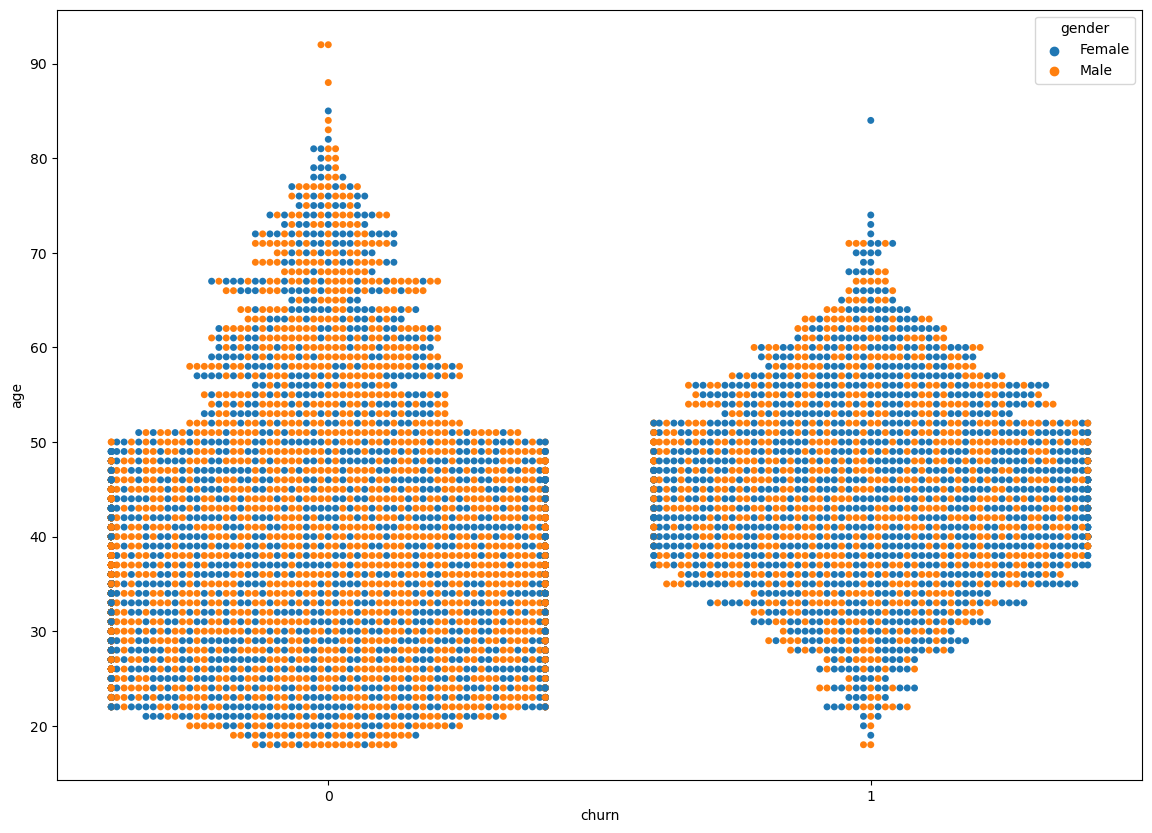

In [33]:
### This es TOO SLOW, that is the above .stripplot()
fig, axswarm1 = plt.subplots(figsize=(14, 10))
sns.swarmplot(x=df.churn, y=df.age, hue=df.gender, ax=axswarm1)

We can see that there are more clients that do not churn and also that inside the ones who churn there ara more females.
Let's see some numbers aboout this.

In [46]:
### To see the number that churn and not-churn
print(f'Total number of clients: {df.churn.count():>8,}')
display(df.churn.value_counts())
# Ratio
display(df.churn.value_counts(normalize=True))
# percentage (cause total =10_000 you can see but the calc. is...)
df.churn.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Total number of clients:   10,000


churn
0    7963
1    2037
Name: count, dtype: int64

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

churn
0    79.63%
1    20.37%
Name: proportion, dtype: object

> In this dataset we have more clients than NOT churn
- that es what we expecto, otherwise the bank crack!

In [123]:
### Def a funct to see numbers in each churn by gender

def see_by_gender(data, v1, v2, col, col2='gender'):
    fullnum = data[col].count()       # total number of cases
    #ls_v1, ls_v2 = [], []
    dic = {'fullnum': fullnum, 'totnum': [], 'Male': [], 'Female':[], 'Male%': [], 'Female%': []}
    for val in [v1, v2]:
        dfv = data[data[col]== val]
        #totnum = dfv.col.count()     # total number of cases w/col == val
        dic['totnum'].append(dfv[col].count())
        serie = dfv[col2].value_counts()
        ser_percent = dfv[col2].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        for gen in ['Male', 'Female']:
            dic[gen].append(serie[gen])
        for gep in ['Male%', 'Female%']:
            gen = gep[:-1]
            dic[gep].append(ser_percent[gen])
    return dic
                
d = see_by_gender(df, 0, 1, 'churn')

# mk the string (could be inside the above u other funct.)
s= f"Total number of clients: {d['fullnum']:>8,}\n"
for v in [0, 1]:
    if v == 0:
        cat = 'Retained'
    else:
        cat = 'Churned'
    s += f"{cat + ' clients:':<17} {d['totnum'][v]:>6,}"
    s += f"  - Males: {d['Male'][v]:>6,}; {d['Male%'][v]:>6}"
    s += f"  - Females: {d['Female'][v]:>6,}; {d['Female%'][v]:>6}\n"

print(s)

Total number of clients:   10,000
Retained clients:  7,963  - Males:  4,559; 57.25%  - Females:  3,404; 42.75%
Churned clients:   2,037  - Males:    898; 44.08%  - Females:  1,139; 55.92%



In [68]:
### To see th number that churn value_cons by gender
dfc1 = df[df.churn == 1]
print(f'As we see above, total number of "churned" clients: {dfc1.churn.count():>8,}')
display(dfc1.gender.value_counts())
# Ratio
display(dfc1.gender.value_counts(normalize=True))
# percentage
sp = dfc1.gender.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
sp
sp['Male']

As we see above, total number of "churned" clients:    2,037


gender
Female    1139
Male       898
Name: count, dtype: int64

gender
Female    0.559156
Male      0.440844
Name: proportion, dtype: float64

'44.08%'

<Axes: xlabel='age', ylabel='tenure'>

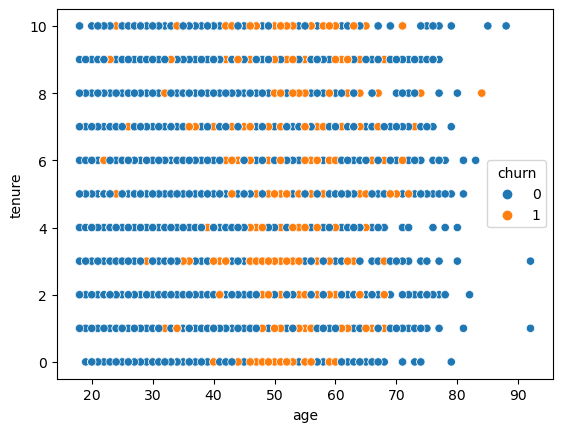

In [111]:
##### to see another scatterplots
sns.scatterplot(x=df.age, y=df.tenure, hue=df.churn)

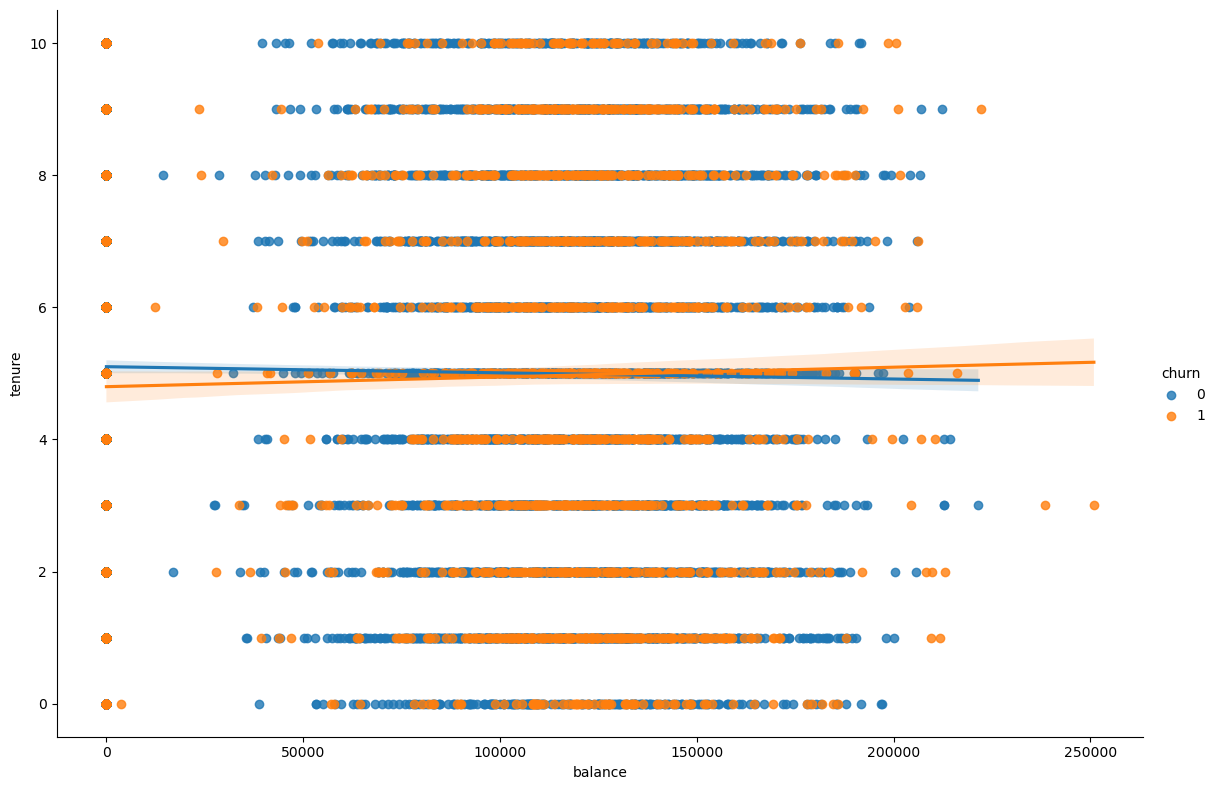

In [121]:
sns.lmplot(data=df, x='balance', y='tenure', hue='churn', height=8, aspect=16/11)

ok!-- scatterplot, regplot, lmplot and swarmplot ready

#### 2.2.- Distribution Charts, Histograms (histplot), KDEplot (Kernel Density Plots)
- histograms about age .. direct but better preproceced little

Text(0.5, 1.0, 'Customer Age Histogram')

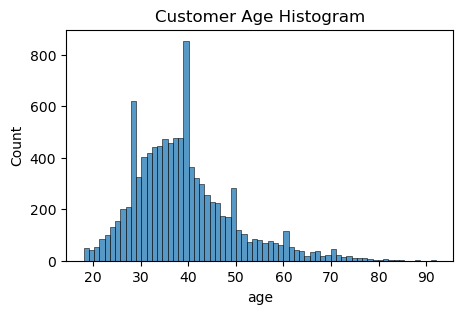

In [131]:
fig, axhist1 = plt.subplots(figsize=(5,3))
sns.histplot(df.age, ax=axhist1)            # same: sns.histplot(data=df, x='age')
axhist1.set_title('Customer Age Histogram')

Text(0.5, 1.0, 'Customer Age Histogram')

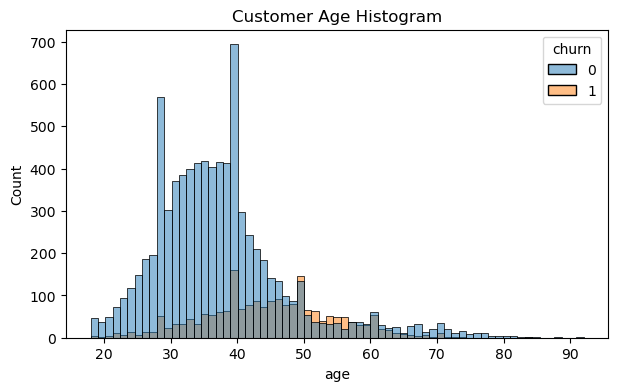

In [134]:
fig, axhist1 = plt.subplots(figsize=(7,4))
sns.histplot(data=df, x='age', hue='churn')
axhist1.set_title('Customer Age Histogram')

Text(0.5, 1.0, 'Distribution of Ages by churn')

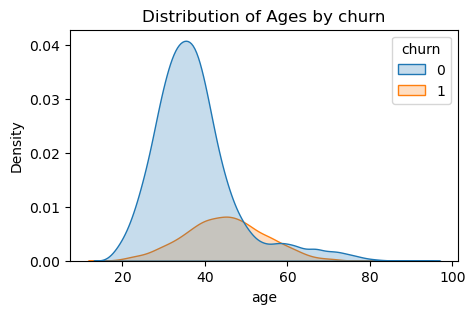

In [135]:
# Kernet DENSITY plot colored
fig, axkde1 = plt.subplots(figsize=(5,3))
sns.kdeplot(data=df, x='age', hue='churn', fill=True, ax=axkde1)
baxkde1.set_title("Distribution of Ages by churn")

In [144]:
[col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
[col for col in df.columns if df[col].dtype != 'object']

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

Text(0.5, 1.0, 'Customers products_number Histogram')

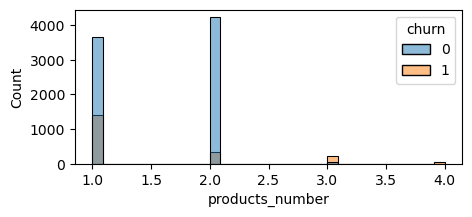

In [157]:
# See histo of all cols and can see that products_number and active_member could be useful
fig, axhist2 = plt.subplots(figsize=(5,2))
sns.histplot(data=df, x='products_number', hue='churn')
axhist1.set_title('Customers products_number Histogram')
### MORE products MORE churn

Text(0.5, 1.0, 'Customer Age Histogram')

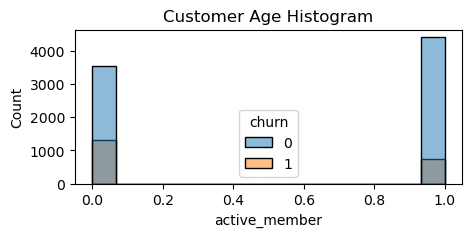

In [156]:
fig, axhist3 = plt.subplots(figsize=(5,2))
sns.histplot(data=df, x='active_member', hue='churn', ax=axhist3)
axhist3.set_title('Customer active_member Histogram')
### Active_member LESS Churn

In [ ]:
### swarmplot is VERY SLOW for to much rows instead stripplot...
fig, axstrip2 = plt.subplots(figsize=(14, 10))
sns.stripplot(x=df.churn, y=df.active_member, hue=df.gender, jitter=0.4, ax=axstrip2)

In [ ]:
### swarmplot or splitplot
fig, axswarm2 = plt.subplots(figsize=(14, 10))
sns.swarmplot(x=df.churn, y=df.active_member, hue=df.gender, ax=axswarm1)

Text(0.5, 1.0, 'relation')

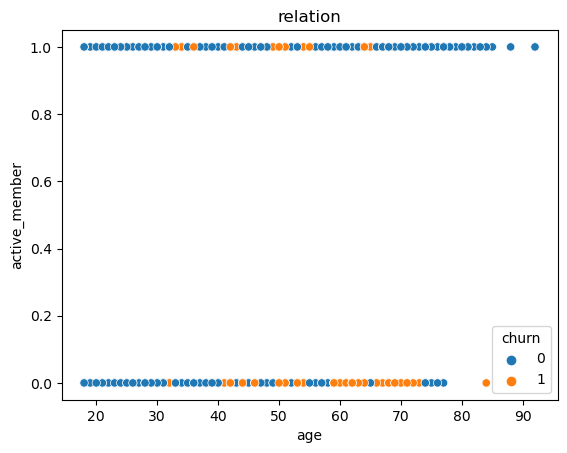

In [158]:
### Scatter to see this relation
fig, axscat4 = plt.subplots()
sns.scatterplot(x=df.age, y=df.active_member, hue=df.churn, ax=axscat4)
axscat4.set_title('relation')

## 2. Bar Charts (and Pie Charts)
- Comparing quantities corresponding to different groups.
- in long-format table mk value_counts() or grupby()
#### Bank Customers vs Country
- value_counts of country
- .barchart value_counts by country

In [11]:
df.country.value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
### sns.barplot a serie -> a function for diff cols
def bars_value_counts(col):
    vc = df[col].value_counts()
    if len(vc.index) > 5:
        lenght, hight = 12, 6
        rot = 90
    else:
        lenght, hight = 6, 4
        rot = 0
    fig, axe = plt.subplots(figsize=(lenght, hight))
    sns.barplot(x=vc.index, y=vc, ax=axe)
    axe.set_xticklabels(vc.index, rotation=rot)

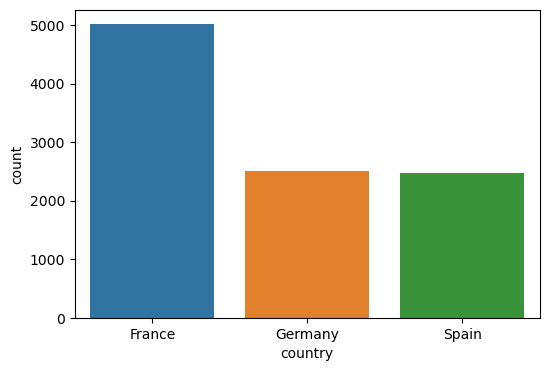

In [13]:
bars_value_counts('country')

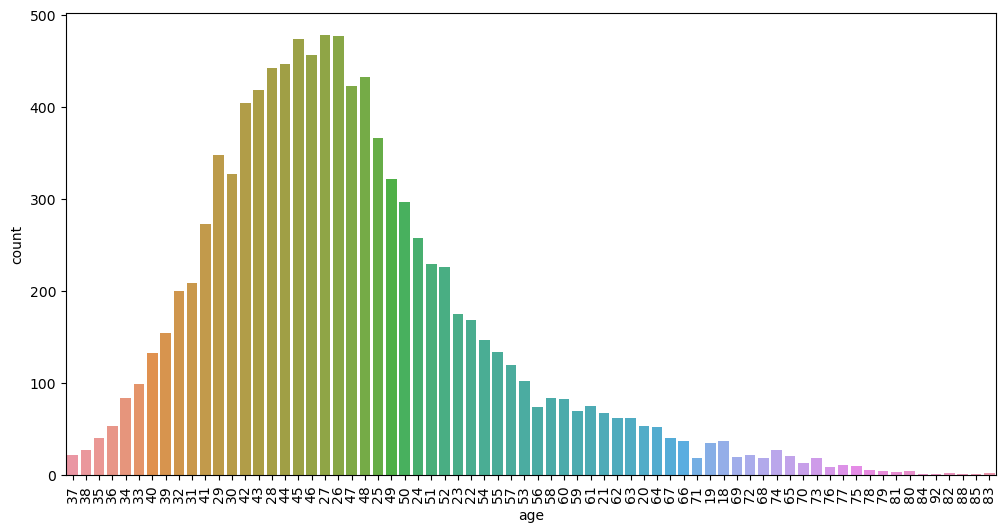

In [14]:
bars_value_counts('age')

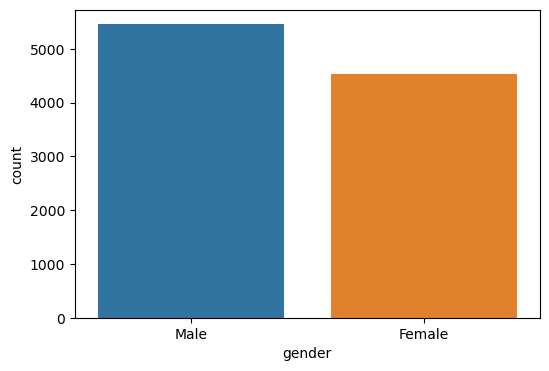

In [15]:
bars_value_counts('gender')

In [16]:
# d1 = df.groupby('country')
# d1.first()
# df.groupby('country').count()

In [17]:
### Funct. to show pie plots 
def func(pct, allvalues):
    #absolute = int(pct / 100.*np.sum(allvalues))
    absolute = int(pct / 100 * np.sum(allvalues))
    #return "{:.1f}%\n({:d} g)".format(pct, absolute)
    return f'{pct:.1f}%\n({absolute:,} custs.)'

def pie_value_counts(col):
    vc = df[col].value_counts()
    aupct = '%.0f%%'    # '%.0f%%'
    colors = sns.color_palette('pastel')[0:5]
    fig, axe = plt.subplots()
    axe.pie(vc, labels=vc.index, colors=colors,
            autopct=lambda pct: func(pct, vc))

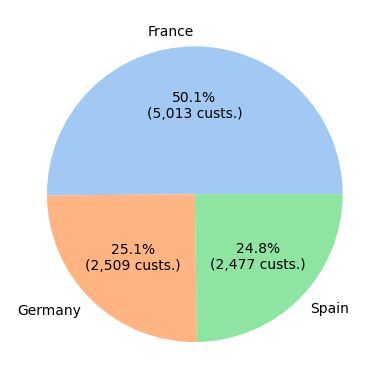

In [18]:
pie_value_counts('country')

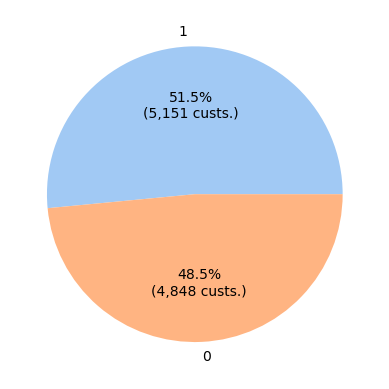

In [19]:
### Customer Activity Status
pie_value_counts('active_member')

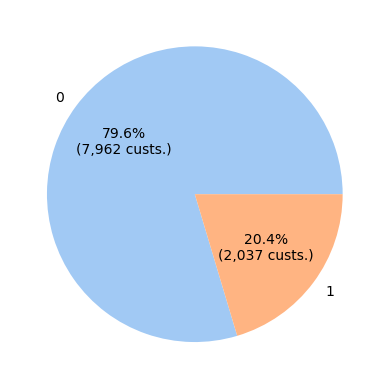

In [20]:
### Customer Retention
pie_value_counts('churn')

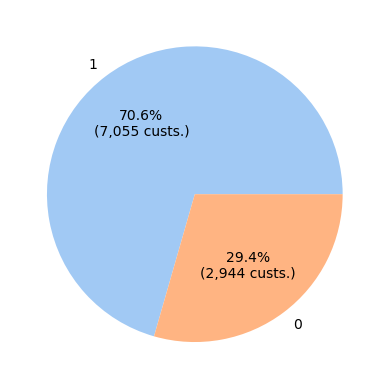

In [21]:
### Customer Credit Card Usage
pie_value_counts('credit_card')

> https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## 3. Distribution Graphs
- Histograms, KDEplots
- In a long-form data table an histogram for each column is posible

Text(0, 0.5, 'Customer Count')

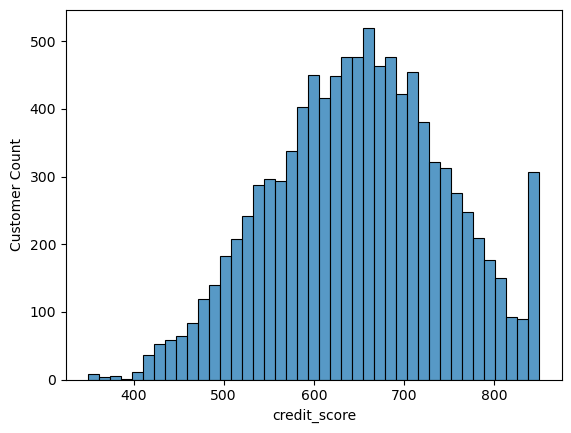

In [22]:
### Bank Customer Credit Scores - credit_score histagram
g = sns.histplot(data=df.credit_score)
g.set_ylabel('Customer Count')

<Axes: xlabel='age', ylabel='Count'>

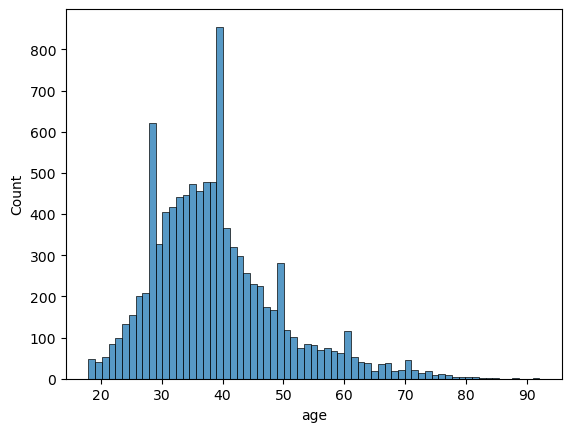

In [23]:
### Customer Ages Histogram
sns.histplot(data=df.age)

### Correlation Heatmap

In [24]:
df.iloc[[0, 5, 9, -9, -5, -1]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [25]:
# d1 = df[['credit_score', 'age', 'tenure', 'balance']]
# d1

<Axes: >

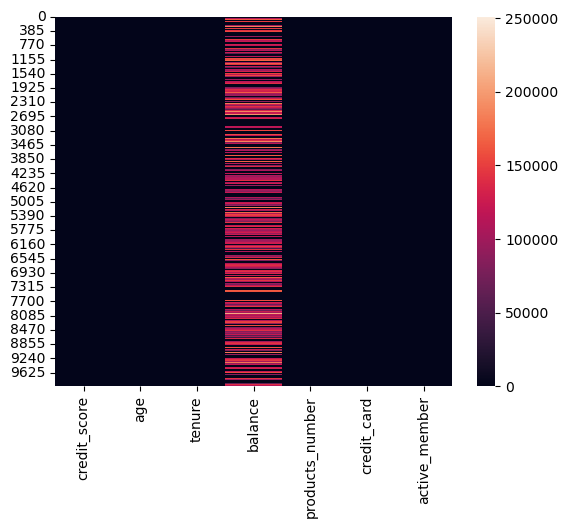

In [26]:
sns.heatmap(data=df[['credit_score', 'age', 'tenure', 'balance',
                     'products_number', 'credit_card', 'active_member']])
## Investigate correlation heapmap fc projects

### Density Plot [mean(), median(), mode()]
- https://rpubs.com/Rvge_mvsrter/939193